In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv("/Users/syedshahid/Project 1/Project1_RealEstate/HUD_PIP_Data.csv")

# Define the list of selected states
selected_states = ['HI', 'UT', 'CO', 'MA', 'CA', 'LA', 'ND', 'MS', 'IL', 'NM', 'AZ']



In [12]:
# Filter the data to include only the specified states and the years from 2013 to 2023
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2023) & (df['State'].isin(selected_states))]

# Convert 'Overall Homeless' column to numeric using .loc to avoid SettingWithCopyWarning
df_filtered.loc[:, 'Overall Homeless'] = pd.to_numeric(df_filtered['Overall Homeless'], errors='coerce')

# Drop rows with NaN values in 'Overall Homeless' column
df_filtered = df_filtered.dropna(subset=['Overall Homeless'])

In [13]:
# Calculate summary statistics
yearly_stats = df_filtered.groupby('Year')['Overall Homeless'].agg(['mean', 'median', 'std', 'min', 'max'])
state_stats = df_filtered.groupby('State')['Overall Homeless'].agg(['mean', 'median', 'std', 'min', 'max'])

# Print summary statistics
print("Yearly Summary Statistics:")
print(yearly_stats)
print("\nState Summary Statistics:")
print(state_stats)

Yearly Summary Statistics:
              mean  median           std     min       max
Year                                                      
2013  17586.454545  6335.0  33908.219170  2069.0  118552.0
2014  17241.272727  6918.0  32621.060789  1258.0  113952.0
2015       17322.0  7620.0  33178.980153  1305.0  115738.0
2016  17203.909091  7921.0  33943.644732   923.0  118142.0
2017  18018.363636  7220.0  37993.352196  1089.0  131532.0
2018  18028.636364  6530.0  37573.210585   542.0  129972.0
2019  19700.636364  6412.0  43958.433032   557.0  151278.0
2020  20774.727273  6458.0  46982.833561   541.0  161548.0
2021   9692.363636  3565.0  16414.676965   548.0   57468.0
2022  21950.272727  7373.0  49847.345199   610.0  171521.0
2023  23622.727273  6223.0  52693.661196   784.0  181399.0

State Summary Statistics:
                mean    median           std      min       max
State                                                          
AZ      10337.090909   10007.0   2295.227721   5460

In [14]:
# Combine the data into a single DataFrame
combined_df = pd.merge(df_filtered, yearly_stats, on='Year', suffixes=('', '_Yearly'))

# Pivot the combined DataFrame
combined_df_pivoted = combined_df.pivot(index='Year', columns='State', values='Overall Homeless')

# Display the first few rows of the pivoted DataFrame
print("\nFirst Few Rows of the Pivoted DataFrame:")
print(combined_df_pivoted.head())


First Few Rows of the Pivoted DataFrame:
State       AZ        CA       CO      HI       IL      LA       MA      MS  \
Year                                                                          
2013   10562.0  118552.0   9754.0  6335.0  13425.0  5226.0  19029.0  2403.0   
2014   10495.0  113952.0  10028.0  6918.0  13107.0  4606.0  21237.0  2226.0   
2015    9896.0  115738.0   9953.0  7620.0  13177.0  4081.0  21135.0  1983.0   
2016    9707.0  118142.0  10550.0  7921.0  11590.0  3994.0  19608.0  1738.0   
2017    8947.0  131532.0  10940.0  7220.0  10798.0  3305.0  17565.0  1472.0   

State      ND      NM      UT  
Year                           
2013   2069.0  2819.0  3277.0  
2014   1258.0  2746.0  3081.0  
2015   1305.0  2629.0  3025.0  
2016    923.0  2263.0  2807.0  
2017   1089.0  2482.0  2852.0  


In [15]:
import os

# Check if the directory exists, if not, create it
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the Rental into a csv
combined_df_pivoted.to_csv(f"{output_dir}/homelessbystate.csv")

combined_df_pivoted.head()
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(combined_df_pivoted)


State       AZ        CA       CO      HI       IL      LA       MA      MS  \
Year                                                                          
2013   10562.0  118552.0   9754.0  6335.0  13425.0  5226.0  19029.0  2403.0   
2014   10495.0  113952.0  10028.0  6918.0  13107.0  4606.0  21237.0  2226.0   
2015    9896.0  115738.0   9953.0  7620.0  13177.0  4081.0  21135.0  1983.0   
2016    9707.0  118142.0  10550.0  7921.0  11590.0  3994.0  19608.0  1738.0   
2017    8947.0  131532.0  10940.0  7220.0  10798.0  3305.0  17565.0  1472.0   
2018    9865.0  129972.0  10857.0  6530.0  10643.0  3059.0  20068.0  1352.0   
2019   10007.0  151278.0   9619.0  6412.0  10199.0  2941.0  18471.0  1184.0   
2020   10979.0  161548.0   9846.0  6458.0  10431.0  3173.0  17975.0  1107.0   
2021    5460.0   57468.0   8544.0  2490.0   7958.0  2131.0  15079.0   626.0   
2022   13553.0  171521.0  10397.0  5967.0   9212.0  7373.0  15507.0  1196.0   
2023   14237.0  181399.0  14439.0  6223.0  11947.0  

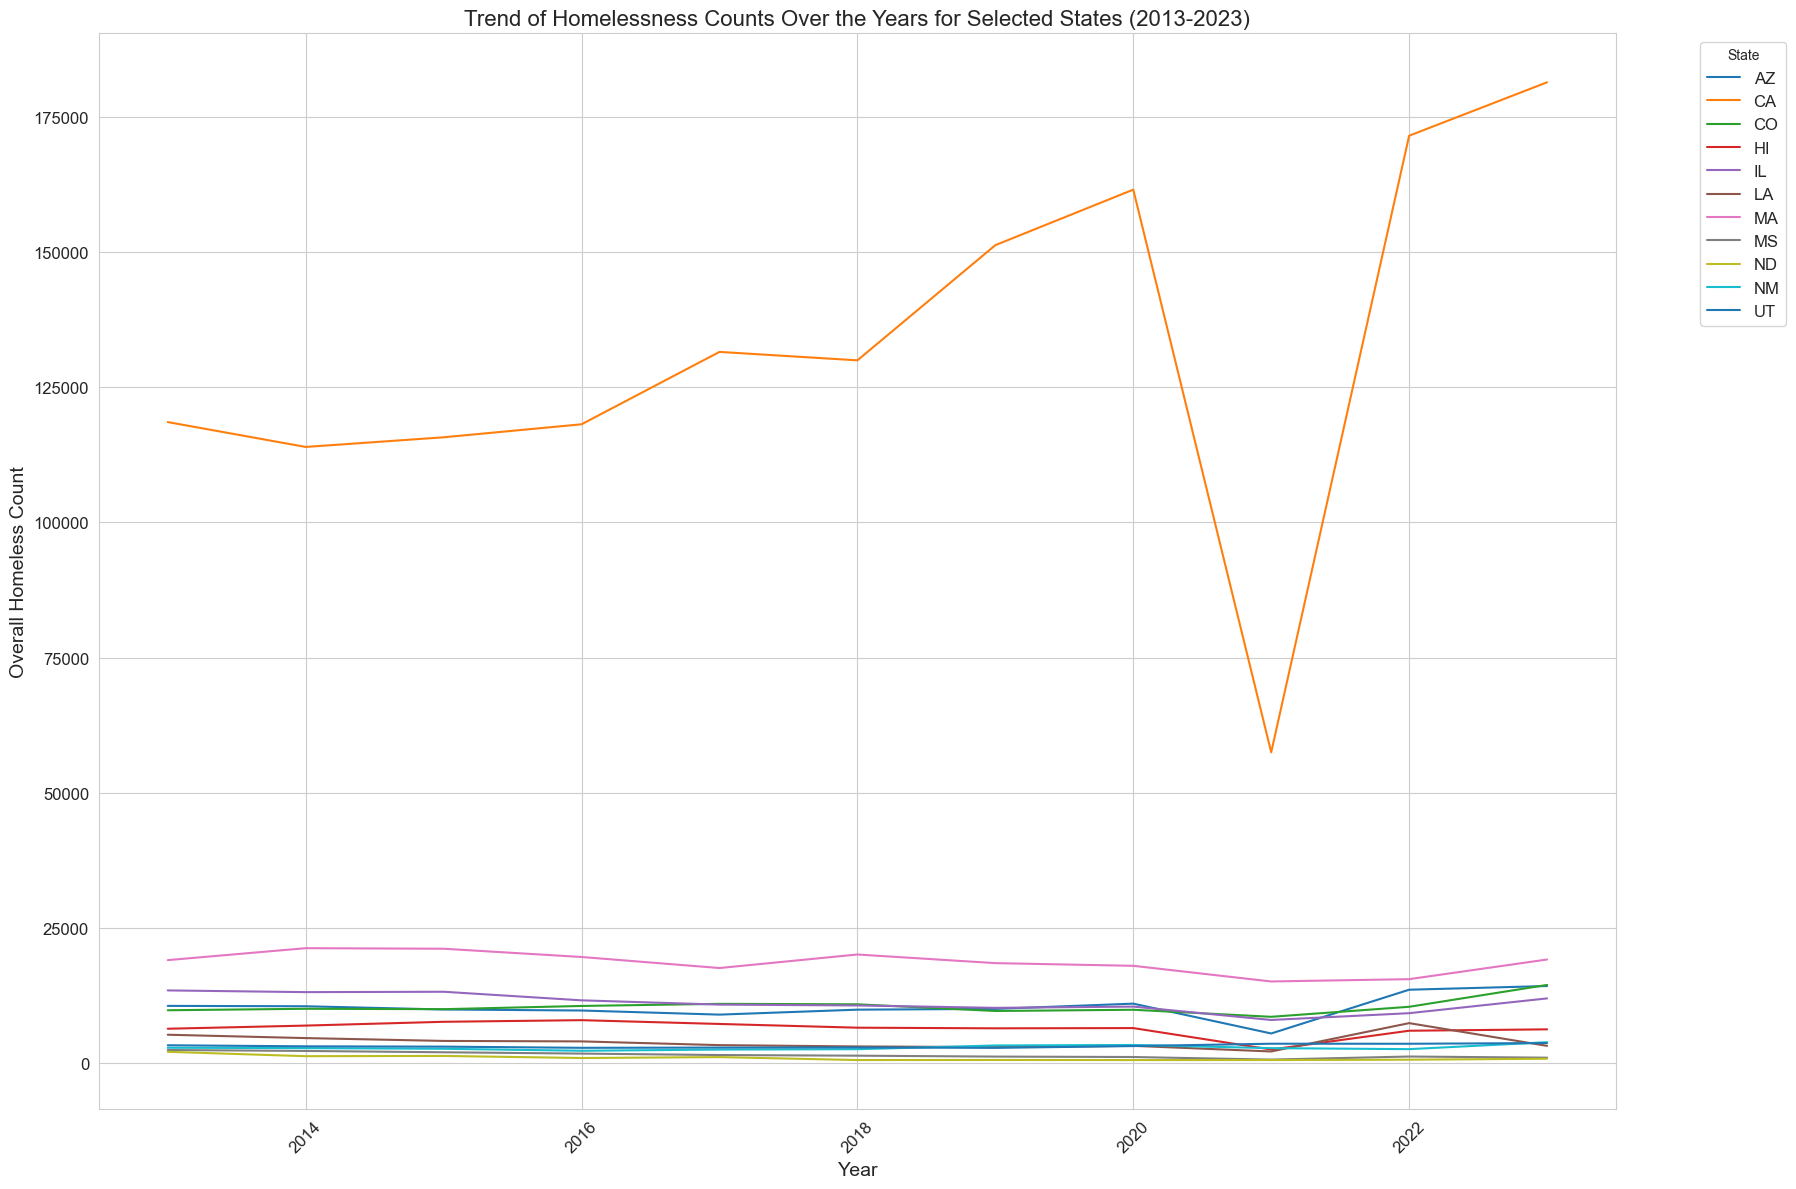

In [16]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Line plot to visualize the trend of homelessness counts over the years for each state
plt.figure(figsize=(18, 12))
sns.lineplot(data=df_filtered, x='Year', y='Overall Homeless', hue='State', palette='tab10')
plt.title('Trend of Homelessness Counts Over the Years for Selected States (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Overall Homeless Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

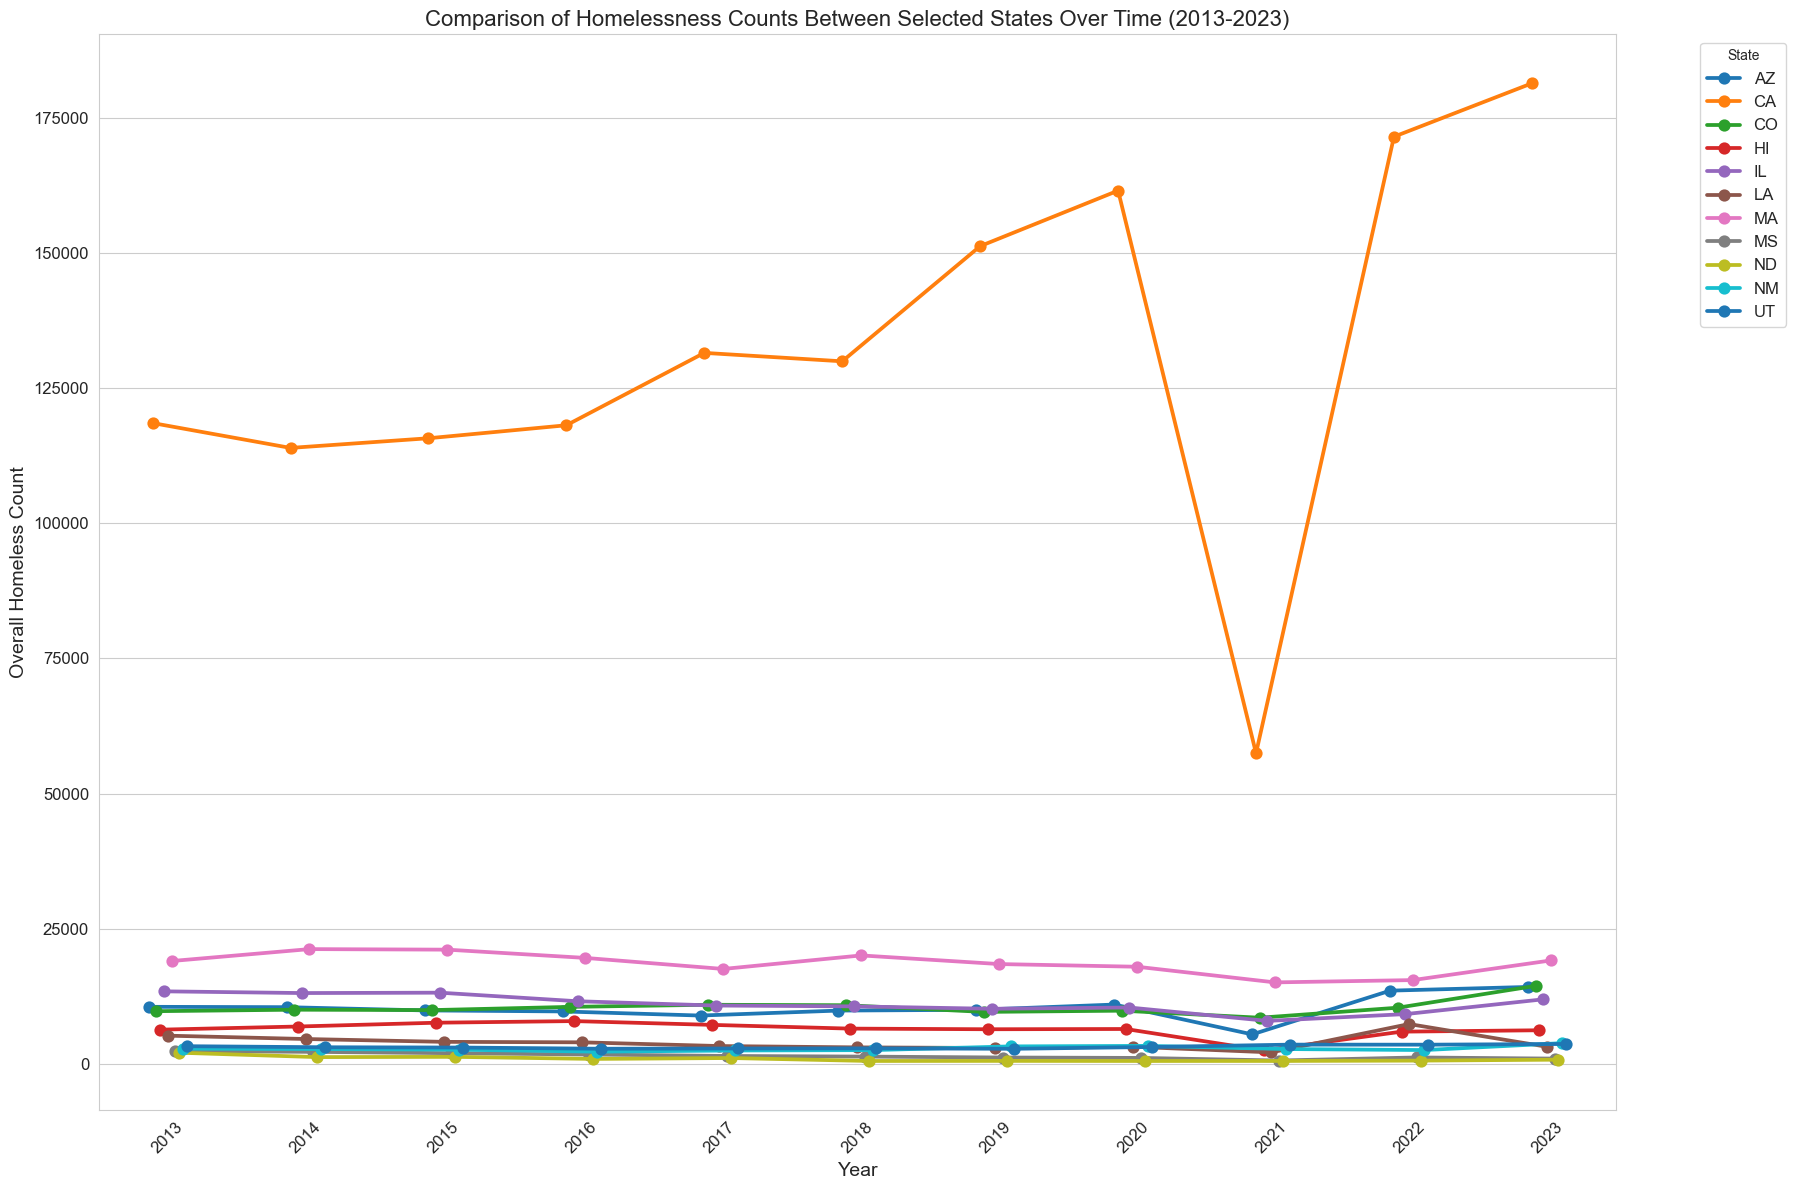

In [17]:
# Plot chart to compare homelessness counts between states over time
plt.figure(figsize=(18, 12))
sns.pointplot(data=df_filtered, x='Year', y='Overall Homeless', hue='State', palette='tab10', dodge=True)
plt.title('Comparison of Homelessness Counts Between Selected States Over Time (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Overall Homeless Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

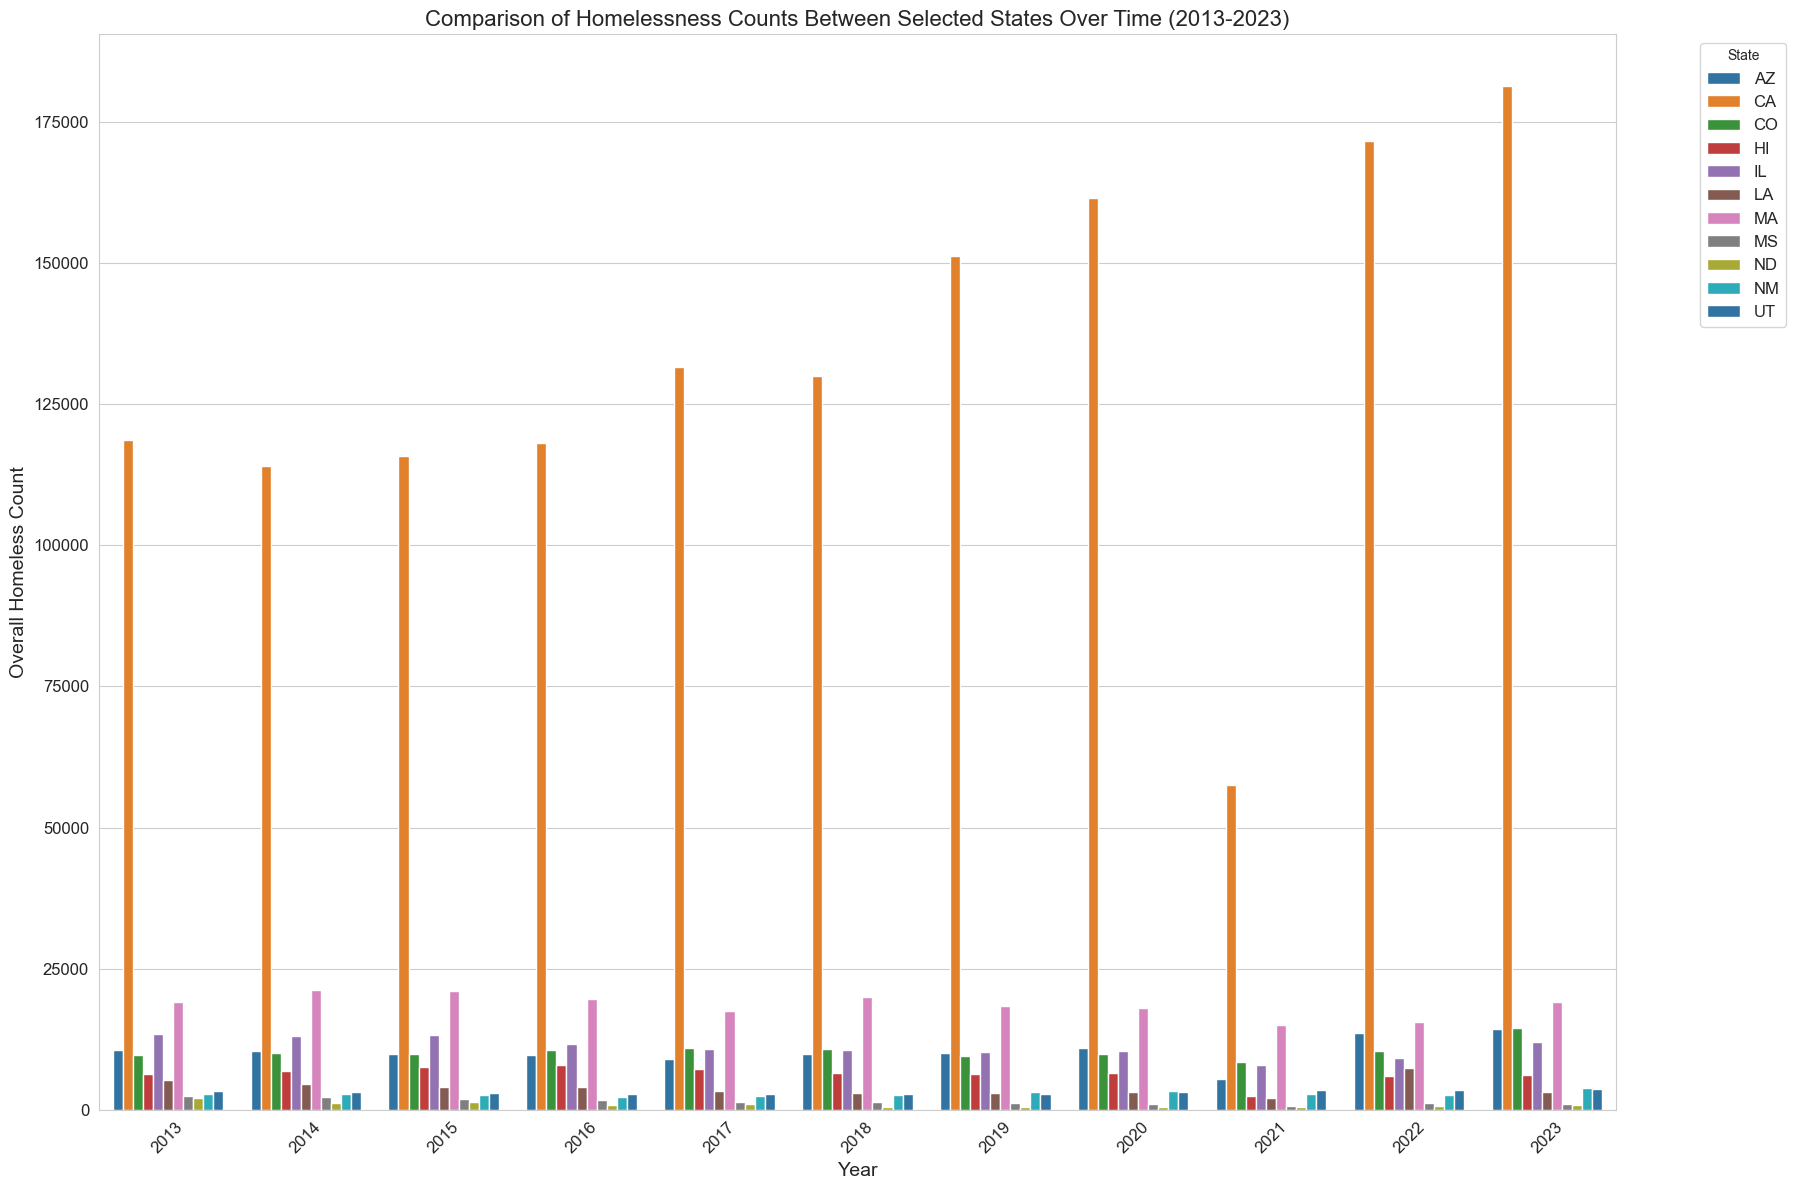

In [18]:
# Bar chart to compare homelessness counts between states over time
plt.figure(figsize=(18, 12))
sns.barplot(data=df_filtered, x='Year', y='Overall Homeless', hue='State', palette='tab10')
plt.title('Comparison of Homelessness Counts Between Selected States Over Time (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Overall Homeless Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()
